In [11]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import  minimize

In [12]:
def sir_model(t, y, alpha, beta):
    S, I = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - alpha * I
    return [dSdt, dIdt]

def solve_sir(alpha, beta, S0, I0, days):
    sol = solve_ivp(
        sir_model,
        [0, days],
        [S0, I0],
        args=(alpha, beta),
        t_eval=np.linspace(0, days, days + 1)
    )
    
    return sol.t, sol.y

In [13]:
# Messdaten
data_t = np.array([5, 10, 15, 35, 60])
data_I = np.array([5, 20, 63, 32, 2])
N = 500
S0 = N - 1
I0 = 1


def objective(params):
    alpha, beta = params
    _, results = solve_sir(alpha, beta, S0, I0, max(data_t))
    I_pred = results[1, data_t]
    return np.sum((data_I - I_pred)**2)
    
    
# Startwerte für die Optimierung
initial_params = [0.25, 0.0001]
bounds = [(0, None), (0, None)]

# Minimierung
result = minimize(objective, initial_params, bounds=bounds, method='L-BFGS-B')
alpha_opt, beta_opt = result.x



In [ ]:
R0 = beta_opt * S0 / alpha_opt

def calculate_attack_rate(alpha, beta):
    _, results = solve_sir(alpha, beta, S0, I0, 100)
    S_final = results[0, -1]
    attack_rate = (S0 - S_final) / S0
    return attack_rate

attack_rate = calculate_attack_rate(alpha_opt, beta_opt)


In [17]:
print("Attack Rate:", attack_rate)
print("R0:", R0)
print("Alpha:", alpha_opt)
print("Beta:", beta_opt)

Attack Rate: 0.8860712981307555
R0: 2.453738950706773
Alpha: 0.21024539411250945
Beta: 0.0010338423101013245


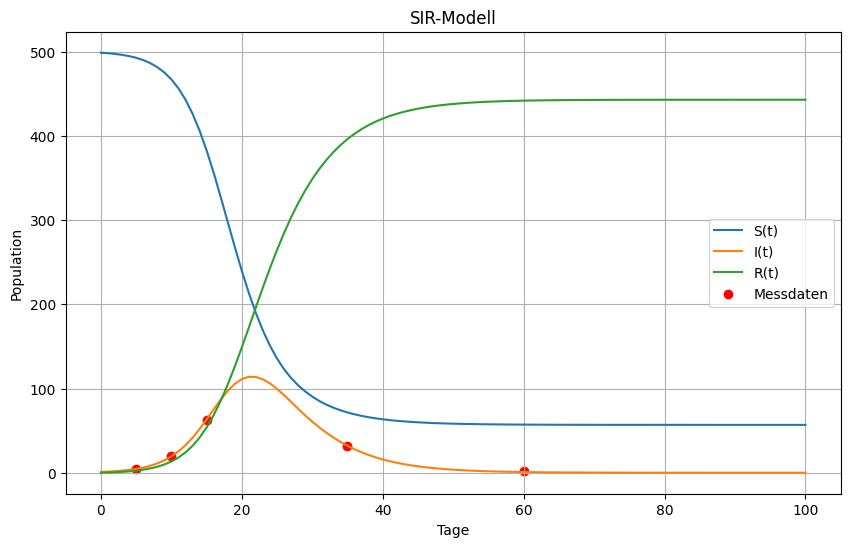

In [ ]:
days = 100
t, results = solve_sir(alpha_opt, beta_opt, S0, I0, days)

plt.figure(figsize=(10, 6))
plt.plot(t, results[0], label='S(t)')
plt.plot(t, results[1], label='I(t)')
plt.plot(t, N - results[0] - results[1], label='R(t)')
plt.scatter(data_t, data_I, color='red', label='Messdaten')
plt.xlabel('Tage')
plt.ylabel('Population')
plt.title('SIR-Modell')
plt.legend()
plt.grid()
plt.show()
